In [2]:
#imports to work with...
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from torch.utils.data import DataLoader
import torch
import torchvision
from torchvision import transforms
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize

from cl_framework.continual_learning.metrics.metric_evaluator_incdec import MetricEvaluatorIncDec
from cl_framework.utilities.matrix_logger import IncDecLogger
from torchmetrics import Recall

In [3]:
path_to_baseline = '../runs_trainings/no_freeze/multilabel/weighted/statistics/mean_over_tasks/forg_ap_per_subcategory.out'
baseline_data = np.loadtxt(path_to_baseline,delimiter=',')
path_to_decremental = '../runs_trainings/no_freeze/decremental_multilabel/weighted/statistics/mean_over_tasks/forg_ap_per_subcategory.out'
decremental_data = np.loadtxt(path_to_decremental,delimiter=',')
path_to_incdec = '../runs_trainings/no_freeze/incremental_decremental_multilabel/weighted/statistics/mean_over_tasks/forg_ap_per_subcategory.out'
incdec_data = np.loadtxt(path_to_incdec,delimiter=',')

subcategories_names = ['eating burger','eating cake','eating carrots','eating chips','eating doughnuts',
                       'eating hotdog','eating ice cream','eating spaghetti','eating watermelon','sucking lolly',
                       'tasting beer','tasting food','tasting wine','sipping cup','texting','talking on cell phone',
                       'looking at phone','smoking','smoking hookah','smoking pipe','sleeping','yawning','headbanging',
                       'headbutting','shaking head','scrubbing face','putting in contact lenses','putting on eyeliner',
                       'putting on foundation','putting on lipstick','putting on mascara','brushing hair','brushing teeth',
                       'braiding hair','combing hair','dyeing eyebrows','dyeing hair']
all_behaviors_dict = {
    'food': [
        'eating burger', 'eating cake', 'eating carrots', 'eating chips', 'eating doughnuts',
        'eating hotdog', 'eating ice cream', 'eating spaghetti', 'eating watermelon',
        'sucking lolly', 'tasting beer', 'tasting food', 'tasting wine', 'sipping cup'
    ],
    'phone': [
        'texting', 'talking on cell phone', 'looking at phone'
    ],
    'smoking': [
        'smoking', 'smoking hookah', 'smoking pipe'
    ],
    'fatigue': [
        'sleeping', 'yawning', 'headbanging', 'headbutting', 'shaking head'
    ],
    'selfcare': [
        'scrubbing face', 'putting in contact lenses', 'putting on eyeliner', 'putting on foundation',
        'putting on lipstick', 'putting on mascara', 'brushing hair', 'brushing teeth', 'braiding hair',
        'combing hair', 'dyeing eyebrows', 'dyeing hair'
    ]
}

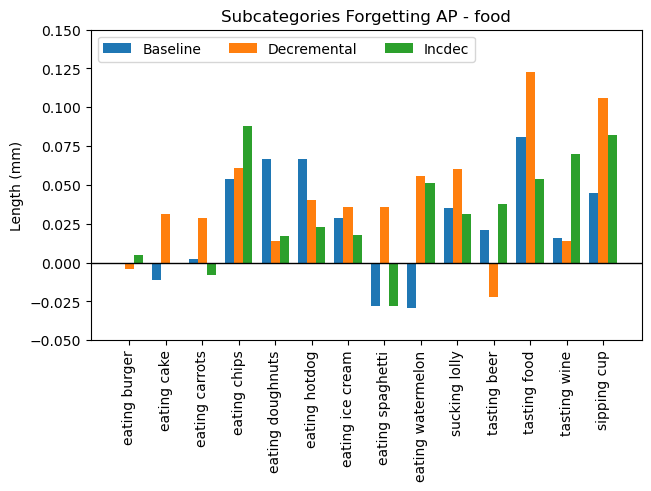

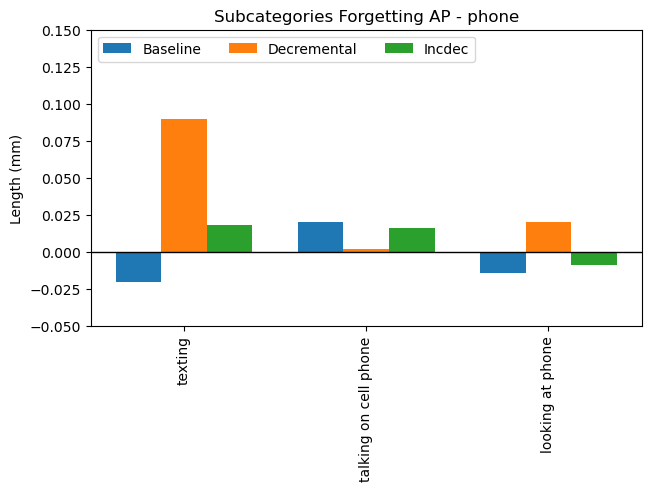

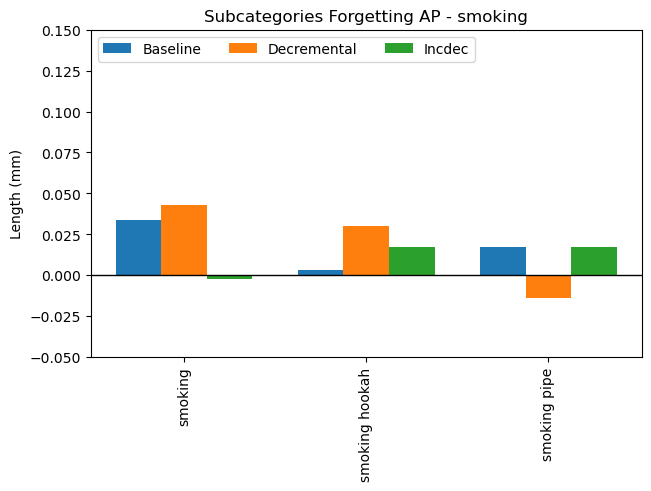

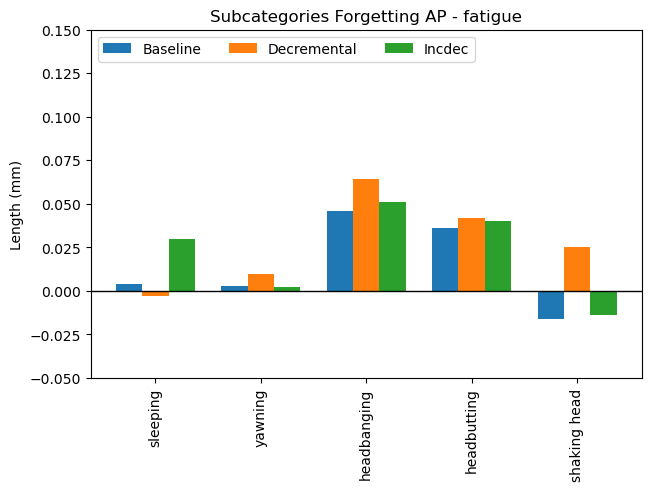

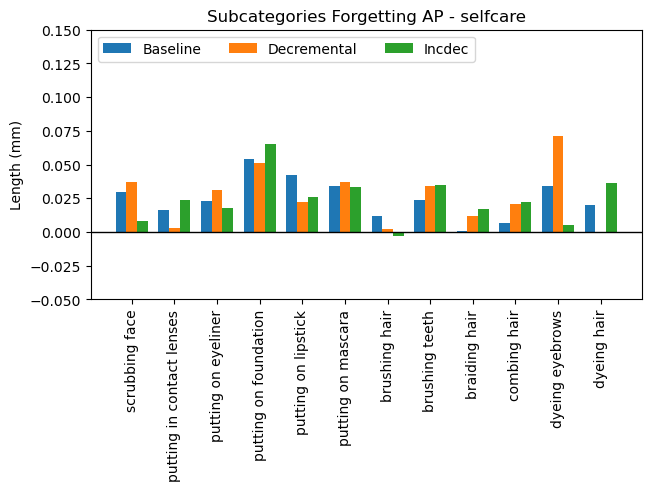

In [15]:
for class_name in all_behaviors_dict:
    subcat_names = all_behaviors_dict[class_name]

    baseline_list = []
    decremental_list = []
    incdec_list = []
    for idx_subcat in range(len(subcat_names)):
        pos_subcat_in_data = subcategories_names.index(subcat_names[idx_subcat])
        baseline_list.append(baseline_data[pos_subcat_in_data])
        decremental_list.append(decremental_data[pos_subcat_in_data])
        incdec_list.append(incdec_data[pos_subcat_in_data])
        

    subcat_means = {
        'Baseline': baseline_list,
        'Decremental': decremental_list,
        'Incdec': incdec_list,
        }

    x = np.arange(len(subcat_names))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in subcat_means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        #ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Length (mm)')
    ax.set_title('Subcategories Forgetting AP - {}'.format(class_name))
    ax.set_xticks(x + width, subcat_names)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(-0.05, 0.15)
    ax.tick_params(axis='x', labelrotation=90)
    ax.axhline(linewidth=1, color='black')

plt.show()

In [18]:
path_to_baseline = '../runs_trainings/freeze_backbone/baseline_multilabel/weighted/statistics/mean_over_tasks/forg_ap_per_subcategory.out'
baseline_data = np.loadtxt(path_to_baseline,delimiter=',')
path_to_decremental = '../runs_trainings/freeze_backbone/decremental_multilabel/weighted/statistics/mean_over_tasks/forg_ap_per_subcategory.out'
decremental_data = np.loadtxt(path_to_decremental,delimiter=',')
path_to_incdec = '../runs_trainings/freeze_backbone/incremental_decremental_multilabel/weighted/statistics/mean_over_tasks/forg_ap_per_subcategory.out'
incdec_data = np.loadtxt(path_to_incdec,delimiter=',')

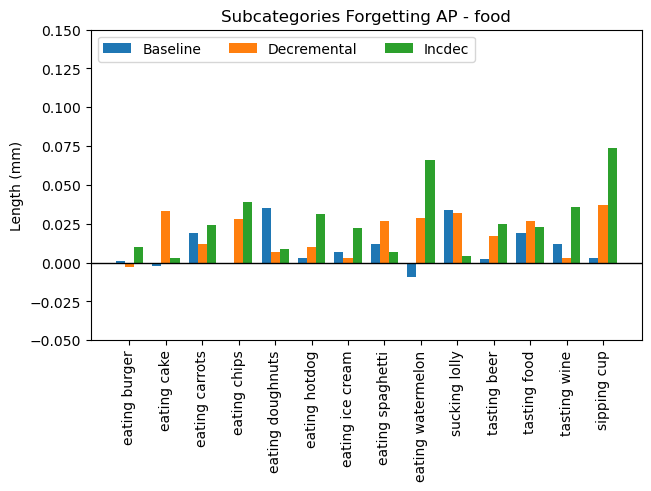

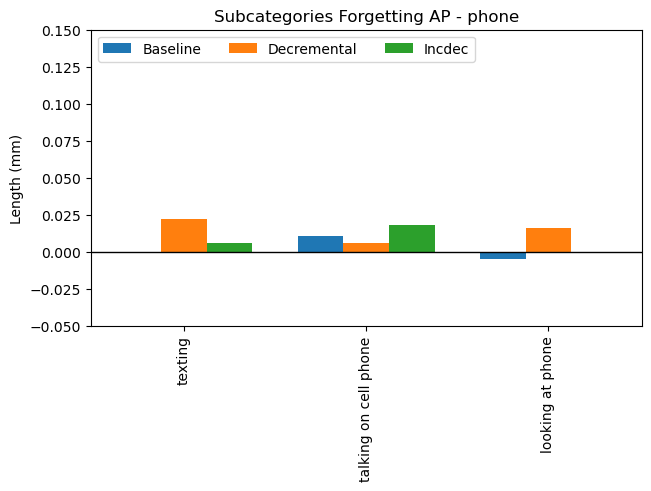

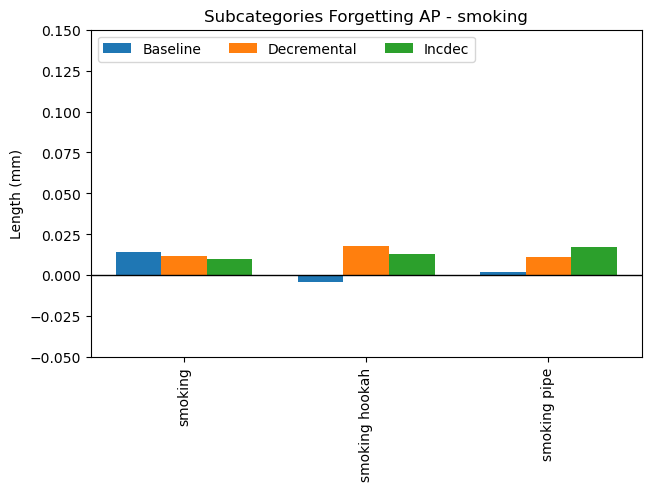

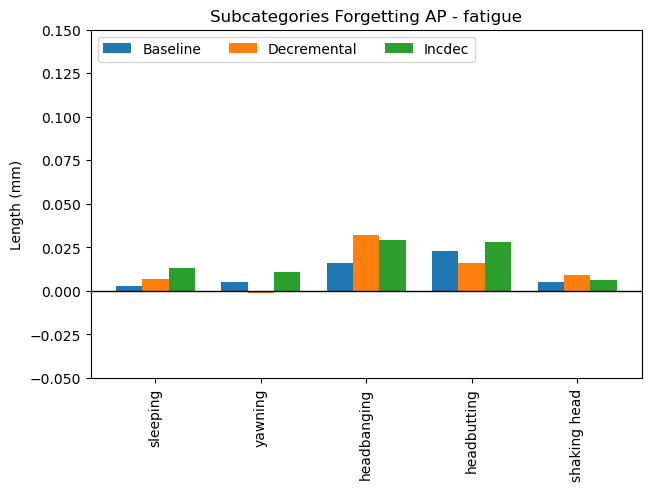

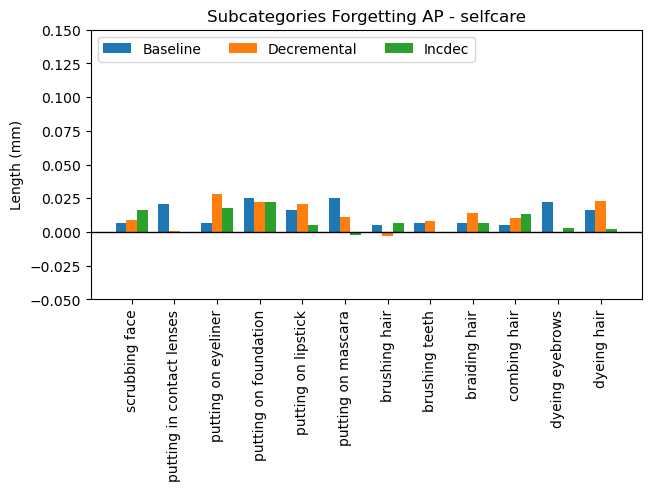

In [19]:
for class_name in all_behaviors_dict:
    subcat_names = all_behaviors_dict[class_name]

    baseline_list = []
    decremental_list = []
    incdec_list = []
    for idx_subcat in range(len(subcat_names)):
        pos_subcat_in_data = subcategories_names.index(subcat_names[idx_subcat])
        baseline_list.append(baseline_data[pos_subcat_in_data])
        decremental_list.append(decremental_data[pos_subcat_in_data])
        incdec_list.append(incdec_data[pos_subcat_in_data])
        

    subcat_means = {
        'Baseline': baseline_list,
        'Decremental': decremental_list,
        'Incdec': incdec_list,
        }

    x = np.arange(len(subcat_names))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in subcat_means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        #ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Length (mm)')
    ax.set_title('Subcategories Forgetting AP - {}'.format(class_name))
    ax.set_xticks(x + width, subcat_names)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(-0.05, 0.15)
    ax.tick_params(axis='x', labelrotation=90)
    ax.axhline(linewidth=1, color='black')

plt.show()